In [58]:
import math 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
def f(x):
  return 3*x**2-4*x+5

In [60]:
f(3)

20

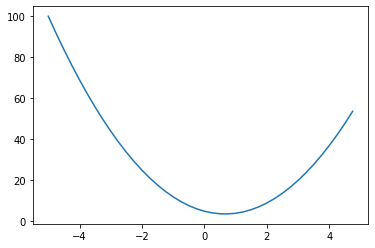

In [61]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [62]:
h=0.000001 # at some poiny of h value the result will be 0.0 bcuz it converges, u can try by making h much smaller
x=2/3          # if we choose x a negative number it'll give us much smaller negative point bcuz it goes positive direction on negative side
(f(x+h)-f(x))/h

2.999378523327323e-06

In [63]:
h=0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0
d1 = a*b+c
a += h 
d2 = a*b+c # a is slightly bigger but b is negative, so it goes negative and becomes smaller than d1

print('d1',d1)
print('d2',d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [64]:
h=0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0
d1 = a*b+c
b += h 
d2 = a*b+c # a and b is positive so d2 will be slightly bigger than d1

print('d1',d1)
print('d2',d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [65]:
h=0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0
d1 = a*b+c
c += h 
d2 = a*b+c 

print('d1',d1)
print('d2',d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [66]:
class Value:

  def __init__(self, data, children=(), op='', label=''):
    self.data = data
    self.grad = 0.0 #initially will be 0 , and representing derivative of oputput(L) w/respect to its value
    self._backward = lambda: None
    self.prev = set(children) # children is tuple but it'll be a set for efficiency
    self.op = op
    self.label = label
  def __repr__(self): #returns the output
    return f"Value(data={self.data})"

  def __add__(self,other):
    other = other if isinstance(other, Value) else Value(other) # we added this row in case of if we use a+1 to change the value
    out = Value(self.data+other.data, (self,other),'+') #feed with its own values
    
    def _backward():
      self.grad += 1.0*out.grad # instead of setting(=) we use += for preventing override while backpropagation
      other.grad += 1.0*out.grad
    out.backward=_backward
    return out
  def __mul__(self,other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self,other),'*'),
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
      out.backward = _backward
    out = Value(self.data*other.data,(self,other),'*')
    return out
  def __rmul__(self, other):
    return self*other
  def __truediv__(self,other):
    return self*(other**-1)
  def __sub__(self,other):
    return self+(-other)
  def __neg__(self):
    return self*-1
  def tanh(self):
    x=self.data
    t =(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out = Value(t,(self,),'tanh')
    def _backward():
      self.grad +=(1-t**2)*out.grad
    out.backward = _backward
    return out
  def exp(self):
    x = self.data
    out = Value(math.exp(x),(self,),'exp')
    def _backward():
      self.grad += out.data * out.grad
      out._backward += _backward
  def __pow__(self, other):
    assert isinstance(other, (int, float)), 'only supports int and float powers for now'
    out = Value(self.data**other, (self,), f'**{other}')
    def _backward():
      self.grad += other*(self.data**(other-1))*out.grad
    out._backward = _backward
  def backward():
    # topological order of all nodes from right to left
    topo =[] 
    visited =set()
    def build_topo(v):
      if v not in v.prev:
        visited.add(v)
        for child in v.prev:
          build_topo(child)
        topo.append(v)
    build_topo(o)
    topo

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()



a = Value(2,label = 'a')
b = Value(-3.0,label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f=Value(-2.0,label='f')
L = d*f; L.label = 'L'
L
#d = a*b+c # (a.__add__(b)).__mul__(c)


Value(data=-8.0)

In [67]:
 d.prev

{Value(data=-6.0), Value(data=10.0)}

In [68]:
d.op

'+'

In [69]:
from graphviz import Digraph # it visualize the graph

def trace(root): #trace enumerates all of the nodes and edges
  #build a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v.prev:
        edges.add((child,v))
        build(child)
  build(root)
  return nodes,edges

def draw_dot(root):
  dot=Digraph(format='svg', graph_attr={'rankdir':'LR'}) #LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    #for any value in the graph, create a rectangular ('record') node for it
    #dot.node(name = uid, label ="{%s | data %.4f | grad %.4f" %(n.label,n.data,n.grad), shape="record")
    if n.op:
      dot.node(name=uid+n.op, label = n.op)
      #and connect this node to it
      dot.edge(uid+n.op,uid)

  for n1, n2 in edges:
    #connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2))+n2.op)
  
  return dot

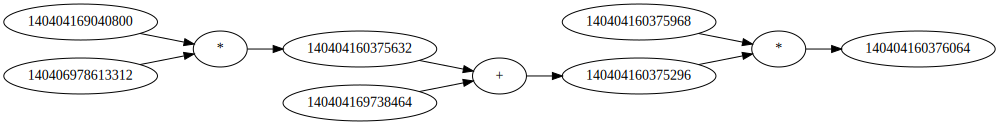

In [70]:
draw_dot(L) #L is the output

L= d*f

dL/dd = f

(f(c+h)-f(x))/h

(d+h)*f - d*f)/h

(d*f + h*f - d*f)/h

(h*f)/h=f

In [71]:
#now we will reverse this process for back propagation!, and to do it we will take derivatives of these values with respect of L
f.grad = 4.0
d.grad = -2
c.grad = -2
e.grad = -2

In [72]:
def lol():
  h=.0001
  a = Value(2,label = 'a')
  b = Value(-3.0,label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e+c; d.label = 'd'
  f=Value(-2.0,label='f')
  L = d*f; L.label = 'L'
  L1=L.data

  a = Value(2,label = 'a')
  b = Value(-3.0,label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e+c; d.label = 'd'
  f=Value(-2.0+h,label='f') #f will give likely 4
  L = d*f; L.label = 'L'
  L2=L.data

  print((L2-L1)/h)

lol()

3.9999999999995595


In [73]:
def lol():
  h=.0001
  a = Value(2,label = 'a')
  b = Value(-3.0,label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e+c; d.label = 'd'
  f=Value(-2.0,label='f')
  L = d*f; L.label = 'L'
  L1=L.data

  a = Value(2,label = 'a')
  b = Value(-3.0,label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e+c; d.label = 'd'
  f=Value(-2.0,label='f')
  L = d*f; L.label = 'L'
  L2=L.data

  print((L2-L1)/h) #derivatve will be likely 1

lol()

0.0


dL/de = -2.0

e=a*b # when we get its derivative w\rspct 

a it ll give us b's value

de/da: b

dL/da = (dL/de)* (de/da)

In [74]:
a.grad = 6
b.grad = -4

In [75]:
a.data+=0.01*a.grad
b.data+=0.01*b.grad
c.data+=0.01*c.grad
f.data+=0.01*f.grad

e = a*b
d = e*c
L = d*f

print(L.data)

122.49755392000002


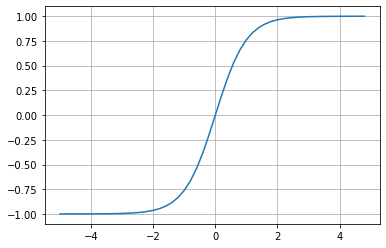

In [76]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); 
plt.grid(); # the demonstration of tanh function

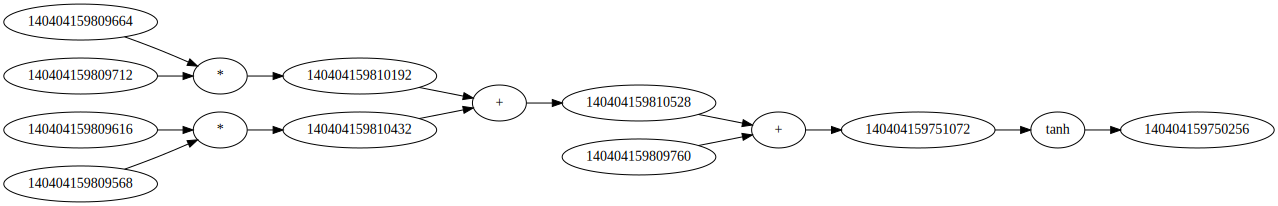

In [77]:
#inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
#weights w1,w2 
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
#bias of the neuron
b = Value(6.7, label='b')
#x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 +  b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()
draw_dot(o)

First Manually doing BackPropagation


In [78]:
n.grad = 0.5
o.grad = 1.0

In [79]:
x1.grad = w1.data*x1w1.grad
w1.grad = x1.data*x1w1.grad

x2.grad = w2.data*x2w2.grad
w2.grad = x2.data*x2w2.grad

In [80]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [81]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

Easily making backpropagation after defining the method

In [82]:
 o.grad = 1.0
 
 o._backward()
 n._backward()

In [83]:
b._backward() #b doesn't have any backward! cuz b is the leaf node
x1w1x2w2._backward()

In [84]:
x2w2._backward()
x1w1._backward()

In [85]:
x1w1x2w2._backward()

In [86]:
o.backward() #Back propagation

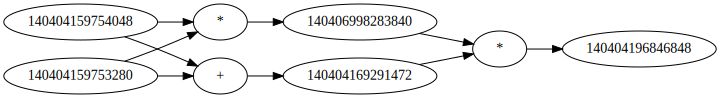

In [87]:
#Override example: That's why we changed '=' with '+=',
#otherwise it woudl override on 'a' and 'b'
a = Value(-2.0, label = 'a')
b = Value(3.0, label = 'b')

d = a*b; d.label = 'd'
e = a+b; e.label = 'e'
f = d*e; f.label = 'f'

f._backward()
draw_dot(f)

In [88]:
a = Value(2.0)
#2*a #python knowa a*2 but doesn't know 2*a in this case we use __rmul__
a.exp()

In [89]:
#for division we'll use __truediv__ it is form of a/b like a* (b^-1)


Doing all these with PyTorch

In [90]:
import torch

In [91]:
x1 = torch.Tensor([2.0]).double()      ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()      ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()      ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()    ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()      ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('--')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())


0.7071066904050358
--
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [1]:
import random
class Neuron:
  def __init__(self,nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self,x):
    #w*x+b
    act = sum((wi*xi for wi,xi in zip(self.w, x)),self.b)
    out = act.tanh()
    return out
  def parameters(self):
    return self.w + [self.b]
class Layer:
  def __init__(self,nin,nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  def __call__(self,x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]
class MLP:
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i],sz[i+1]) for i in range(len(nouts))]
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]


In [181]:
x = [2.0, 3.0, -1.0]
#n = Neuron(2)
#n = Layer(2,3)
n = MLP(3,[4,4,1])
n(x)


Value(data=0.9656447345352194)

In [183]:
len(n.parameters())

41

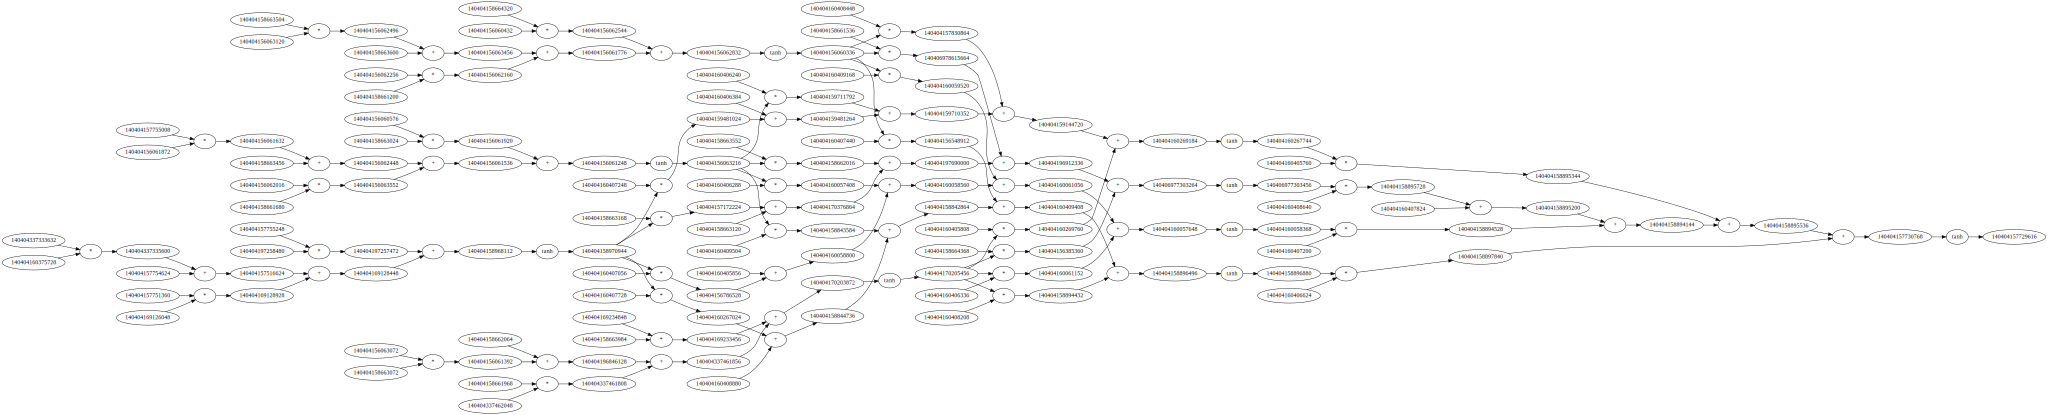

In [159]:
draw_dot(n(x))

In [199]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0] #desired targets

In [168]:
#how to tune these --- ygt = y ground truth
###loss = sum((yout - ygt)**2 for ygt, yout in zip(ys,ypred))
###loss
# regarding the result is negative or positive "yout - ygt" 
#we are taking squre of it to make sure it is always positive

In [195]:
n.layers[1].neurons[0].w[0].data

0.371349491592438

In [190]:
###draw_dot(loss)

In [200]:
for p in n.parameters():
  p.data += -0.01*p.grad
#it'll decrease the data a little bit 

In [202]:
n.parameters()

[Value(data=0.8378976126939646),
 Value(data=-0.5379997948135571),
 Value(data=0.9970060190273007),
 Value(data=0.29404296575286404),
 Value(data=-0.3741747200103367),
 Value(data=-0.056334917984813826),
 Value(data=0.32796638817763246),
 Value(data=0.14311098587294402),
 Value(data=-0.2754958766324471),
 Value(data=-0.8945627234149145),
 Value(data=0.4558781466993651),
 Value(data=0.646265699481591),
 Value(data=0.3541298924296248),
 Value(data=-0.8462059887680498),
 Value(data=0.43347641437847817),
 Value(data=-0.8448937028779173),
 Value(data=0.371349491592438),
 Value(data=0.2266261755338017),
 Value(data=0.4594384998921257),
 Value(data=0.27672406953395323),
 Value(data=-0.8169998776176486),
 Value(data=-0.7499394481508708),
 Value(data=-0.7891866010048747),
 Value(data=-0.5424775706052758),
 Value(data=-0.5491811682656942),
 Value(data=0.5576957342721962),
 Value(data=0.12253884900811142),
 Value(data=0.04512299057510738),
 Value(data=0.18630331640626063),
 Value(data=-0.33741054

It'll give us the showcase of NN convergence to 0 

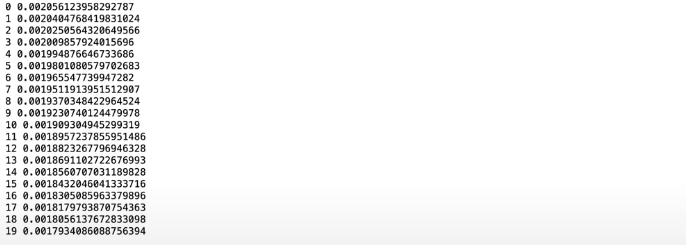

In [211]:
for k in range(20):
  ypred = [n(x) for x in xs]
  loss=sum((yout-ygt)**2 for ygt, yout in zip(ys,ypred))
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  #we gotta make sure reset grads to zero (zero_grad)
  for p in n.parameters():
    p.data += -0.05*p.grad

print(k,loss.data)